<a href="https://colab.research.google.com/github/19PA1A0484/Artificial-intelligence-and-machine-learning-2nd-year-1st-sem/blob/master/churn%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/churn.csv")
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [5]:
df.size

147903

In [6]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [9]:
df.columns=df.columns.str.lower().str.replace(" ","_")
cate=list(df.dtypes[df.dtypes=='object'].index)
for i in cate:
  df[i]=df[i].str.lower().str.replace(" ",'_')


In [10]:
df.head().T

0  ...                 4
customerid              7590-vhveg  ...        9237-hqitu
gender                      female  ...            female
seniorcitizen                    0  ...                 0
partner                        yes  ...                no
dependents                      no  ...                no
tenure                           1  ...                 2
phoneservice                    no  ...               yes
multiplelines     no_phone_service  ...                no
internetservice                dsl  ...       fiber_optic
onlinesecurity                  no  ...                no
onlinebackup                   yes  ...                no
deviceprotection                no  ...                no
techsupport                     no  ...                no
streamingtv                     no  ...                no
streamingmovies                 no  ...                no
contract            month-to-month  ...    month-to-month
paperlessbilling               yes  ...               yes
paymentmethod     electronic_check  ...  electronic_check
monthlycharges               29.85  ...              70.7
totalcharges                 29.85  ...            151.65
churn                           no  ...               yes

[21 rows x 5 columns]

In [11]:
df.churn.value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

In [12]:
df.churn=(df.churn=='yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
df_ful_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_ful_train,test_size=0.25,random_state=1)

In [15]:
len(df_train),len(df_test),len(df_val)

(4225, 1409, 1409)

In [16]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [17]:
y_train=df_train.churn.values
y_test=df_test.churn.values
y_val=df_val.churn.values

del df_train['churn']
del df_test['churn']
del df_val['churn']

In [18]:
df_ful_train=df_ful_train.reset_index(drop=True)


In [19]:
df_ful_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [20]:
df_ful_train.churn.mean()

0.26996805111821087

In [21]:
k=df.dtypes[df.dtypes=='object'].index
k

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges'],
      dtype='object')

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [38]:
categorical=['gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', ]

In [39]:
df_ful_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [23]:
churn_male=df_ful_train[df_ful_train.gender=='male'].churn.mean()
churn_male

0.2632135306553911

In [24]:
churn_female=df_ful_train[df_ful_train.gender=='female'].churn.mean()
churn_female

0.27682403433476394

In [25]:
global_churn=df_ful_train.churn.mean()

In [26]:
global_churn-churn_female

-0.006855983216553063

In [27]:
global_churn-churn_male

0.006754520462819769

In [28]:
df_ful_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [29]:
churn_partner=df_ful_train[df_ful_train.partner=='yes'].churn.mean()
churn_partner

0.20503330866025166

In [30]:
churn_no_partner=df_ful_train[df_ful_train.partner=='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [31]:
global_churn - churn_no_partner

-0.05984095297455855

In [32]:
churn_no_partner / global_churn

1.2216593879412643

In [33]:
churn_partner / global_churn

0.7594724924338315

In [36]:
from IPython.display import display

In [40]:
for c in categorical:
  print(c)
  df_group=df_ful_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff']=df_group['mean']-global_churn
  df_group['risk']=df_group['mean']/global_churn
  display(df_group)
print()
print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472

dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651

phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412

multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948

internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201

onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570

onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660

deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480

techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390

streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328

streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182

contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730

paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560

paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
mutual_info_score(df_ful_train.churn,df_ful_train.contract)

0.0983203874041556

In [43]:
mutual_info_score(df_ful_train.churn,df_ful_train.partner)

0.009967689095399745

In [44]:
def mutual(series):
  return mutual_info_score(series,df_ful_train.churn)

In [45]:
u=df_ful_train[categorical].apply(mutual)
u.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [46]:
df_ful_train.tenure.max()

72

In [47]:
df_ful_train[df_ful_train.tenure<=2].churn.mean()

0.5953420669577875

In [48]:
df_ful_train[(df_ful_train.tenure > 2) & (df_ful_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [49]:
df_ful_train[df_ful_train.tenure>12].churn.mean()

0.17634908339788277

In [50]:
df_ful_train[df_ful_train.monthlycharges>=20].churn.mean()

0.28715756751505733

In [ ]:
df_ful_train[(df_ful_train.monthlycharges > 20) & (df_ful_train.monthlycharges <=50)].churn.mean()

0.18340943683409436

In [51]:
df_ful_train[df_ful_train.monthlycharges>=50].churn.mean()

0.3248223216635957

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [66]:
dv= DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [56]:
z = np.linspace(-7, 7, 51)

In [57]:
sigmoid(10000)

1.0

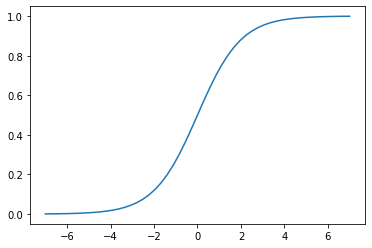

In [58]:
plt.plot(z, sigmoid(z))

In [76]:
from sklearn.linear_model import LogisticRegression

In [78]:
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [61]:
model.intercept_[0]

-0.2341038822334135

In [62]:
model.coef_[0].round(3)

array([ 1.093,  0.464, -1.767, ...,  0.05 , -0.08 , -0.117])

In [80]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00348856, 0.18761038, 0.17320352, ..., 0.13412937, 0.82705354,
       0.82912851])

In [82]:
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8048261178140526

In [83]:
len(y_val)

1409

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_val,y_pred>=0.5)

0.8048261178140526

In [98]:
threshold=np.linspace(0,1,43)
scores=[]

In [99]:
for i in threshold:
  score=accuracy_score(y_val,y_pred>=i)
  print('%.2f %.3f' %(i,score))
  scores.append(score)

0.00 0.274
0.02 0.494
0.05 0.529
0.07 0.563
0.10 0.586
0.12 0.615
0.14 0.644
0.17 0.662
0.19 0.686
0.21 0.706
0.24 0.728
0.26 0.745
0.29 0.754
0.31 0.762
0.33 0.768
0.36 0.776
0.38 0.786
0.40 0.784
0.43 0.790
0.45 0.797
0.48 0.802
0.50 0.805
0.52 0.803
0.55 0.806
0.57 0.805
0.60 0.800
0.62 0.793
0.64 0.792
0.67 0.782
0.69 0.774
0.71 0.759
0.74 0.745
0.76 0.737
0.79 0.731
0.81 0.729
0.83 0.726
0.86 0.726
0.88 0.726
0.90 0.726
0.93 0.726
0.95 0.726
0.98 0.726
1.00 0.726


In [100]:
import matplotlib.pyplot as plt

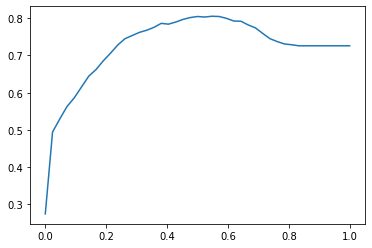

In [101]:
plt.plot(threshold , scores)